## Uppgift 1 - uppvärmning covid-19 data
Börja med att manuellt läsa Excel-filerna och de olika bladen i varje dokument. Använd därefter Pandas för att läsa in bladet: "Veckodata Riket" i covid19-filen.

In [1]:
# Importing some of the tools i need
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# File paths
covid19_file = "../Data/Folkhalsomyndigheten_Covid19.xlsx"
vaccine_file = "../Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx"


# Reading in sheet for the excel file
covid19 = pd.read_excel(covid19_file, sheet_name="Veckodata Riket")

covid19.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


## a) Gör initial dataanalys för att snabbt få en överblick över datasetet. Använd metoder som ex. info(),
describe(), value_counts(), head(), columns, index för att snabbt få en överblick.

In [2]:
# How big of a dataset am I working with?
# How does the dataset look like?
# What kind of variables are in the dataset?


covid19.columns  # We can get a feel for the columns

Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv'],
      dtype='object')

In [3]:
covid19.describe()  # Summaries of general tendencies

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2020.957746,26.035211,18378.345070,177.197183,354.169014,1.125288e+06,10843.281690,67.176056,6000.464789,144.936620,14.000000,12321.154930,1187.840841
std,0.797809,14.228835,38569.455753,371.689114,725.677174,9.618084e+05,9265.100705,73.435000,3076.853993,173.659331,16.796551,6103.235009,587.255605
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,3075.000000,30.000000,59.750000,1.014860e+05,982.500000,14.000000,2643.750000,25.250000,2.425000,5880.000000,569.375000
50%,2021.000000,26.000000,5531.000000,53.000000,107.500000,1.085848e+06,10461.500000,27.500000,7559.500000,77.500000,7.450000,14610.500000,1407.650024
75%,2022.000000,37.750000,21125.000000,203.500000,421.250000,2.423603e+06,23350.500000,109.000000,8863.250000,185.500000,17.950000,17177.750000,1654.999969
max,2022.000000,53.000000,265043.000000,2554.000000,5024.000000,2.609725e+06,25144.000000,289.000000,9539.000000,664.000000,64.300003,20581.000000,1982.900024


In [4]:
covid19.shape  # 142 rows and 34 columns

(142, 13)

In [5]:
covid19.duplicated() # Nothing is duplicated

0      False
1      False
2      False
3      False
4      False
       ...  
137    False
138    False
139    False
140    False
141    False
Length: 142, dtype: bool

In [6]:
covid19.info()  # Everything is filled. This is nice data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

## b) Slå ihop kolumnerna "år" och "veckonummer" till en kolumn med namn "Vecka" med följande format:

```py
Vecka
2020v6
2020v7
...
2022v41
```

In [7]:
covid19["veckonummer"], covid19["år"]  # I'm comparing them. Making sure that the dtype is same

(0       6
 1       7
 2       8
 3       9
 4      10
        ..
 137    38
 138    39
 139    40
 140    41
 141    42
 Name: veckonummer, Length: 142, dtype: int64,
 0      2020
 1      2020
 2      2020
 3      2020
 4      2020
        ... 
 137    2022
 138    2022
 139    2022
 140    2022
 141    2022
 Name: år, Length: 142, dtype: int64)

In [8]:
# Merging 2 columns
covid19["år"] = covid19["år"].astype(str) + "v" + covid19["veckonummer"].astype(str)

# Drop column "veckonummer"
covid19 = covid19.drop(columns=["veckonummer"])


covid19.head()

,år,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.0


In [9]:
# Renames every column to english -> and making it easier to see what each column means

covid19 = covid19.rename(
    columns={
        "år": "Week",
        "Antal_fall_vecka": "Amount of cases / week",
        "Antal_fall_100000inv_vecka": "Amount of cases per 100000 popu / week",
        "Antal_fall_100000inv_14dagar": "Amount of cases per 100000 popu / 14 days",
        "Kum_antal_fall": "Cumulative amount of cases",
        "Kum_fall_100000inv": "Cumulative amount of 100000 population cases",
        "Antal_nyaintensivvårdade_vecka": "Total new ICU patients / week",
        "Kum_antal_intensivvårdade": "Cumulative amount of ICU patients",
        "Antal_avlidna_vecka": "Amount of deaths / week",
        "Antal_avlidna_milj_inv_vecka": "Amount of deaths per million popu / week",
        "Kum_antal_avlidna": "Cumulative deaths",
        "Kum_antal_avlidna_milj_inv": "Cumulative deaths per million popu",
    }
)

covid19.head(5)

,Week,Amount of cases / week,Amount of cases per 100000 popu / week,Amount of cases per 100000 popu / 14 days,Cumulative amount of cases,Cumulative amount of 100000 population cases,Total new ICU patients / week,Cumulative amount of ICU patients,Amount of deaths / week,Amount of deaths per million popu / week,Cumulative deaths,Cumulative deaths per million popu
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.0


# Draw line graphs
* c) Draw a line graph that shows Amount of deaths / week from 2020v6-now
* d) Draw a line graph that shows Amount of cases / week from 2020v6-now
* e) Draw a line graph of Amount of deaths / week and Amount of cases / week in the same window from 2020v6-now
* f) Draw a linegraph of Cumulative amount of cases from 2020v6-now

--- Tools ---
* Seaborn
* Plotly express

--- Other ---
* Use subplot 2x2 grid with the graphs

## c) Rita en linjediagram som visar avlidna fall per vecka från 2020v6 till nu.

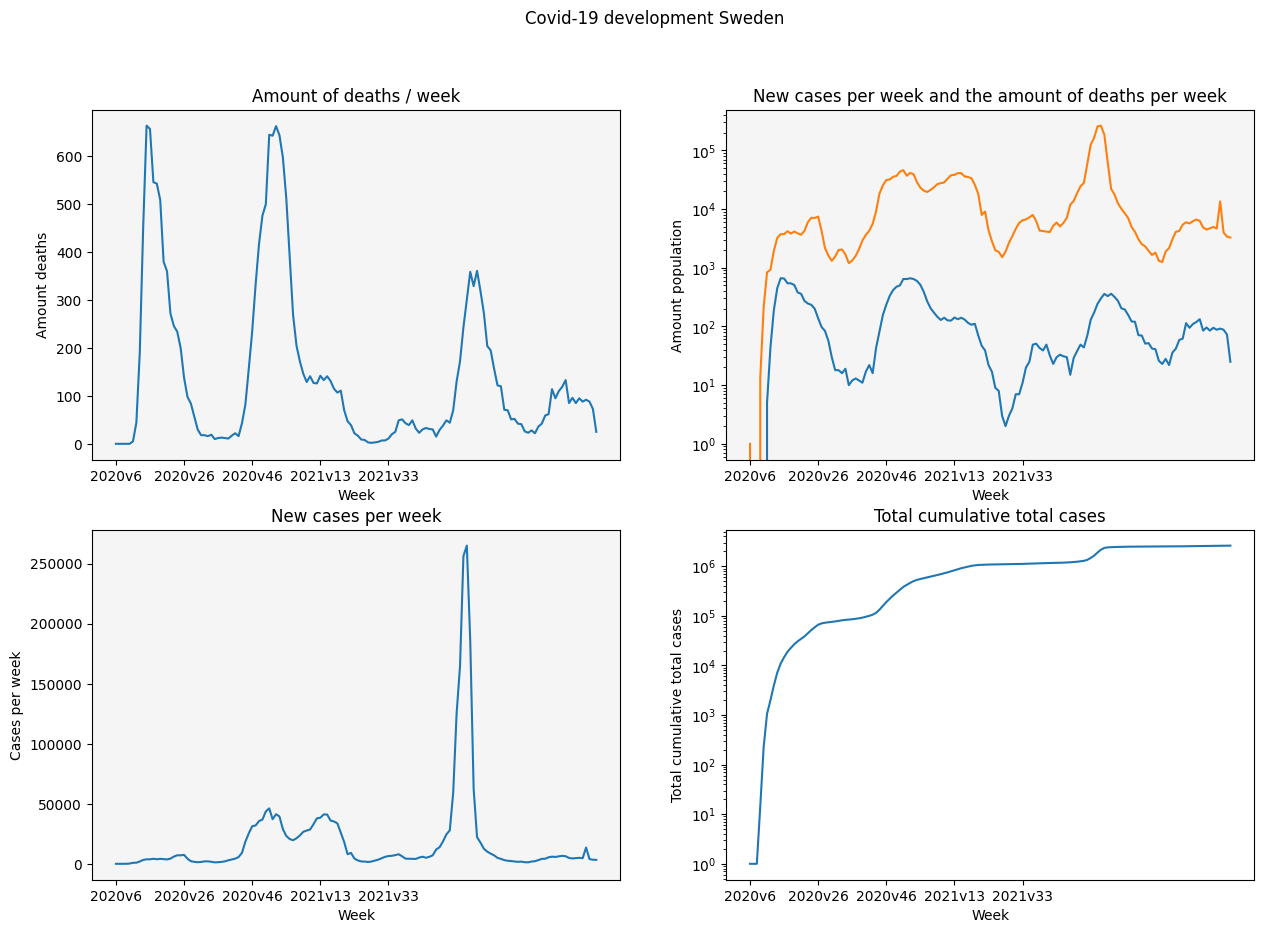

In [10]:

# Creating subplot with 4 graphs
fig, ax = plt.subplots(2, 2) # 2x2 grid
fig.set_size_inches(15, 10)
fig.suptitle("Covid-19 development Sweden")

# c) First graph
sns.lineplot(data = covid19, x="Week", y="Amount of deaths / week", ax=ax[0, 0])
ax[0, 0].set_title("Amount of deaths / week")
ax[0, 0].set_xticks(range(0, 100, 20))  # Set label locations. Start stop step (Steps 15 weeks at a time)
ax[0, 0].set_ylabel("Amount deaths")
ax[0, 0].set_facecolor("whitesmoke")

# d) Second graph
sns.lineplot(data = covid19, x="Week", y="Amount of cases / week", ax=ax[1, 0])
ax[1, 0].set_title("New cases per week")
ax[1, 0].set_xticks(range(0, 100, 20))
ax[1, 0].set_ylabel("Cases per week")
ax[1, 0].set_facecolor("whitesmoke")

# e) Third graph
sns.lineplot(data = covid19, x="Week", y="Amount of deaths / week", ax=ax[0, 1])  # I want a promo aswell
sns.lineplot(data = covid19, x="Week", y="Amount of cases / week", ax=ax[0, 1])
ax[0, 1].set_title("New cases per week and the amount of deaths per week")
ax[0, 1].set_xticks(range(0, 100, 20))
ax[0, 1].set_ylabel("Amount population")
ax[0, 1].set_facecolor("whitesmoke")
ax[0, 1].set(yscale="log")

# Fourth graph
sns.lineplot(data=covid19, x="Week", y="Cumulative amount of cases", ax=ax[1, 1])
ax[1, 1].set_title("Total cumulative total cases")
ax[1, 1].set_xticks(range(0, 100, 20))
ax[1, 1].set_ylabel("Total cumulative total cases")
ax[1, 1].set(yscale="log")

plt.savefig("Visualiseringar/Covid19-Development.png")

## d) Rita en linjediagram som visar nya fall per vecka från 2020v6 till nu.

## e) Rita linjediagram av både avlidna fall per vecka och nya fall per vecka i samma fönster från 2020v6 till nu.


## f) Rita linjediagram av kumulativt antal fall från 2020v6 till nu.